In [1]:
#installing a library for sentiment analysis of russian texts
!pip install dostoevsky

downloading binary model

In [2]:
!python -m dostoevsky download fasttext-social-network-model

In [3]:
# This part of a code helps clean text reviews from symbols and emojis
# packages import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [4]:
reviews = pd.read_csv('../input/bank-app-reviews-rus/sber_app.csv', 
                      parse_dates=["date"], 
                      usecols=[1,2,3,4,5,6])
txt_cols = ['title', 'userName', 'review']

reviews.head()

,title,userName,rating,review,date,isEdited
0,Отличное приложение,Anechkina_smile,5,Я очень довольна. Даже не могу придумать минус...,2017-04-25 06:53:10,False
1,Верните как было,Li$$,1,Хватит забивать приложение и нагружать его вся...,2019-01-12 07:52:02,False
2,Дно,Dykis,1,"Вы настолько мразотный банк, что даже нигде не...",2020-05-31 16:32:19,False
3,Фууууу,пренорвв,1,Че за бред комиссия за перевод внутри банка в ...,2019-08-27 15:39:14,False
4,Разгрузите приложение,Eduardazizov,1,"Уберите все те сомнительные функции, которые д...",2018-10-27 17:27:52,False


A Data frame with reviews contains a lot of artefacts like punctuation marks, emojis and special symbols which difficult to process using a conventional tools for npl sentimenal analysis.
So decided to preprocess text data and remove those symbols.

In [5]:
def reviews_prepocess(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()

for col in txt_cols:
    reviews[col] = [reviews_prepocess(t) for t in reviews[col]]
    
reviews["Date"] = reviews["date"].dt.date
reviews["Time"] = reviews["date"].dt.time
reviews.drop(columns = ['date'], axis = 1, inplace=True)

reviews.head()

,title,userName,rating,review,isEdited,Date,Time
0,отличное приложение,anechkina smile,5,я очень довольна даже не могу придумать минусо...,False,2017-04-25,06:53:10
1,верните как было,li,1,хватит забивать приложение и нагружать его вся...,False,2019-01-12,07:52:02
2,дно,dykis,1,вы настолько мразотный банк что даже нигде не ...,False,2020-05-31,16:32:19
3,фууууу,пренорвв,1,че за бред комиссия за перевод внутри банка в ...,False,2019-08-27,15:39:14
4,разгрузите приложение,eduardazizov,1,уберите все те сомнительные функции которые до...,False,2018-10-27,17:27:52


A prepocessed data contains only lower case letters in the test columns.

In [6]:
# creating strings from text columns for wordcloud

for txt in txt_cols:
    rev = 'rev_' + txt
    locals()[rev] = ''.join(reviews[txt])

In [7]:
stop_words = stopwords.words(['russian', 'english']) + ['банк', 'приложение','приложения','приложении','это']

In [8]:
#creating function for wordcloud drawing
def drawCloud(txtData):
    wordcloud = WordCloud(width = 3000, 
                          height = 2000, 
                          min_font_size = 20,
                          random_state=2, 
                          background_color='lightgray', 
                          margin=30, 
                          colormap='Spectral', 
                          collocations=False, 
                          stopwords = stop_words).generate(txtData)

    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud);

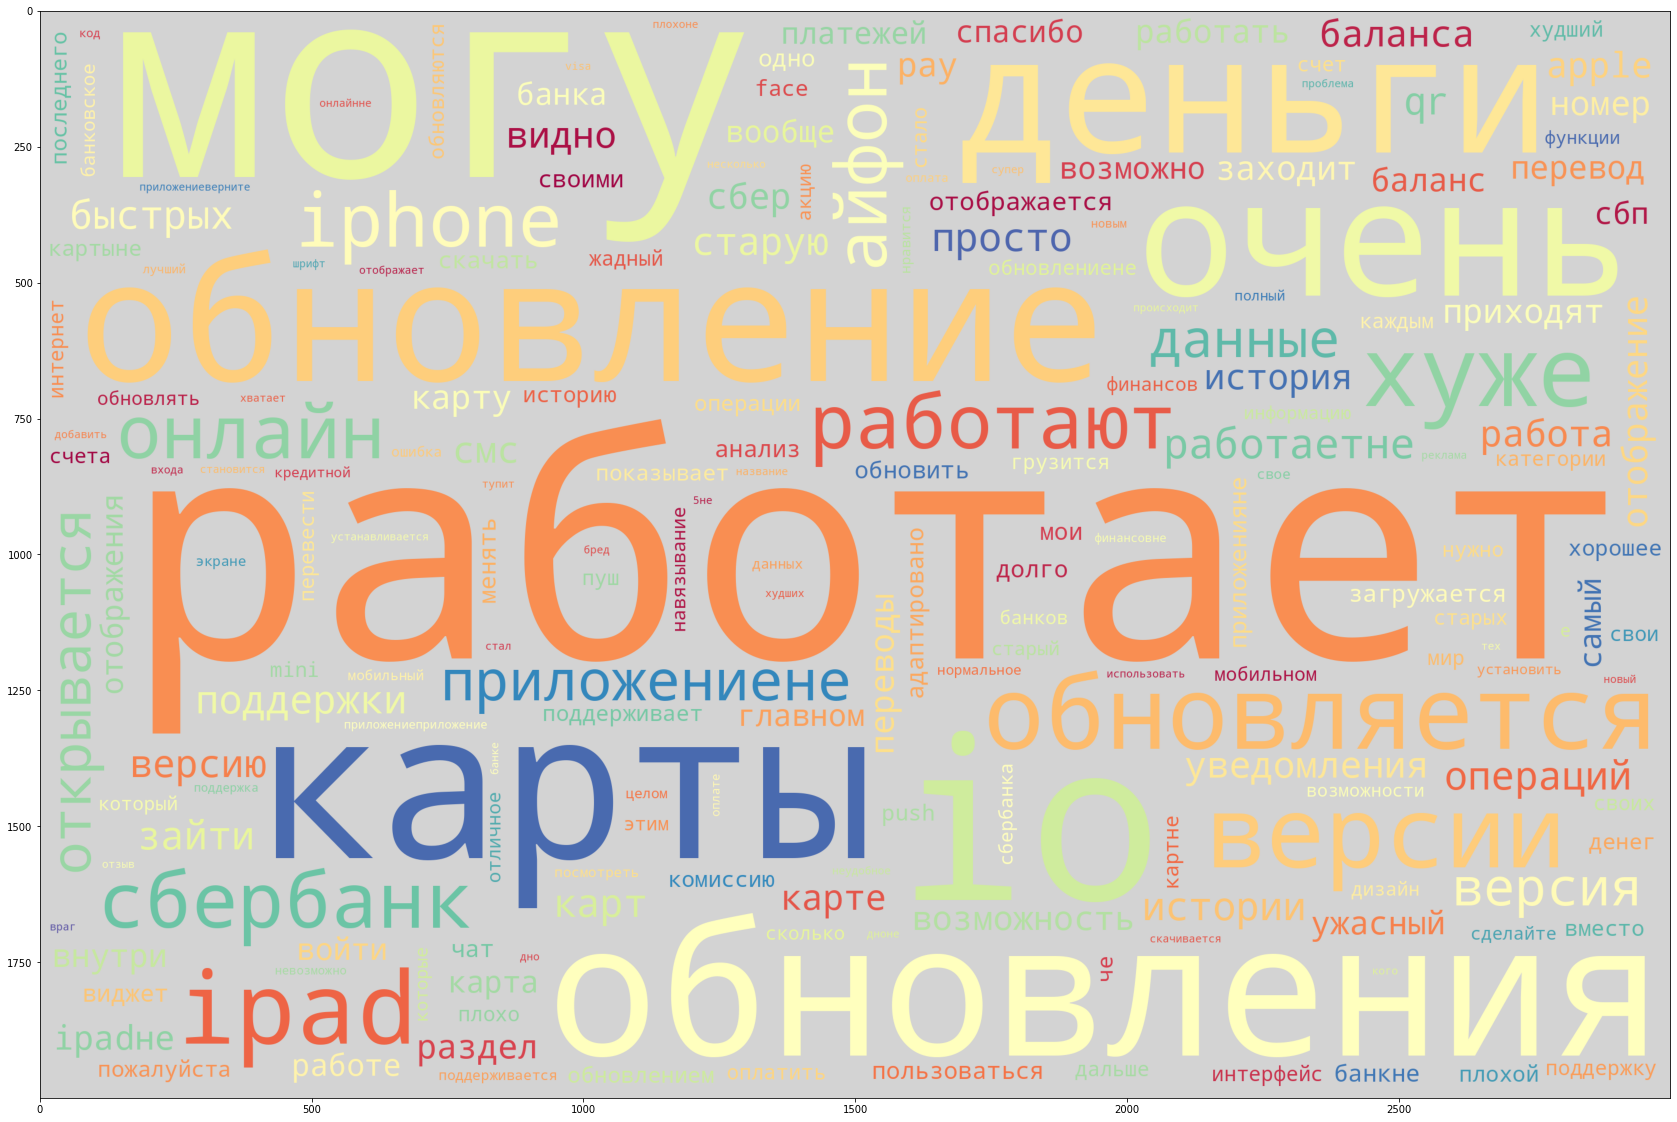

In [9]:
drawCloud(rev_title) # wordcloud of titles

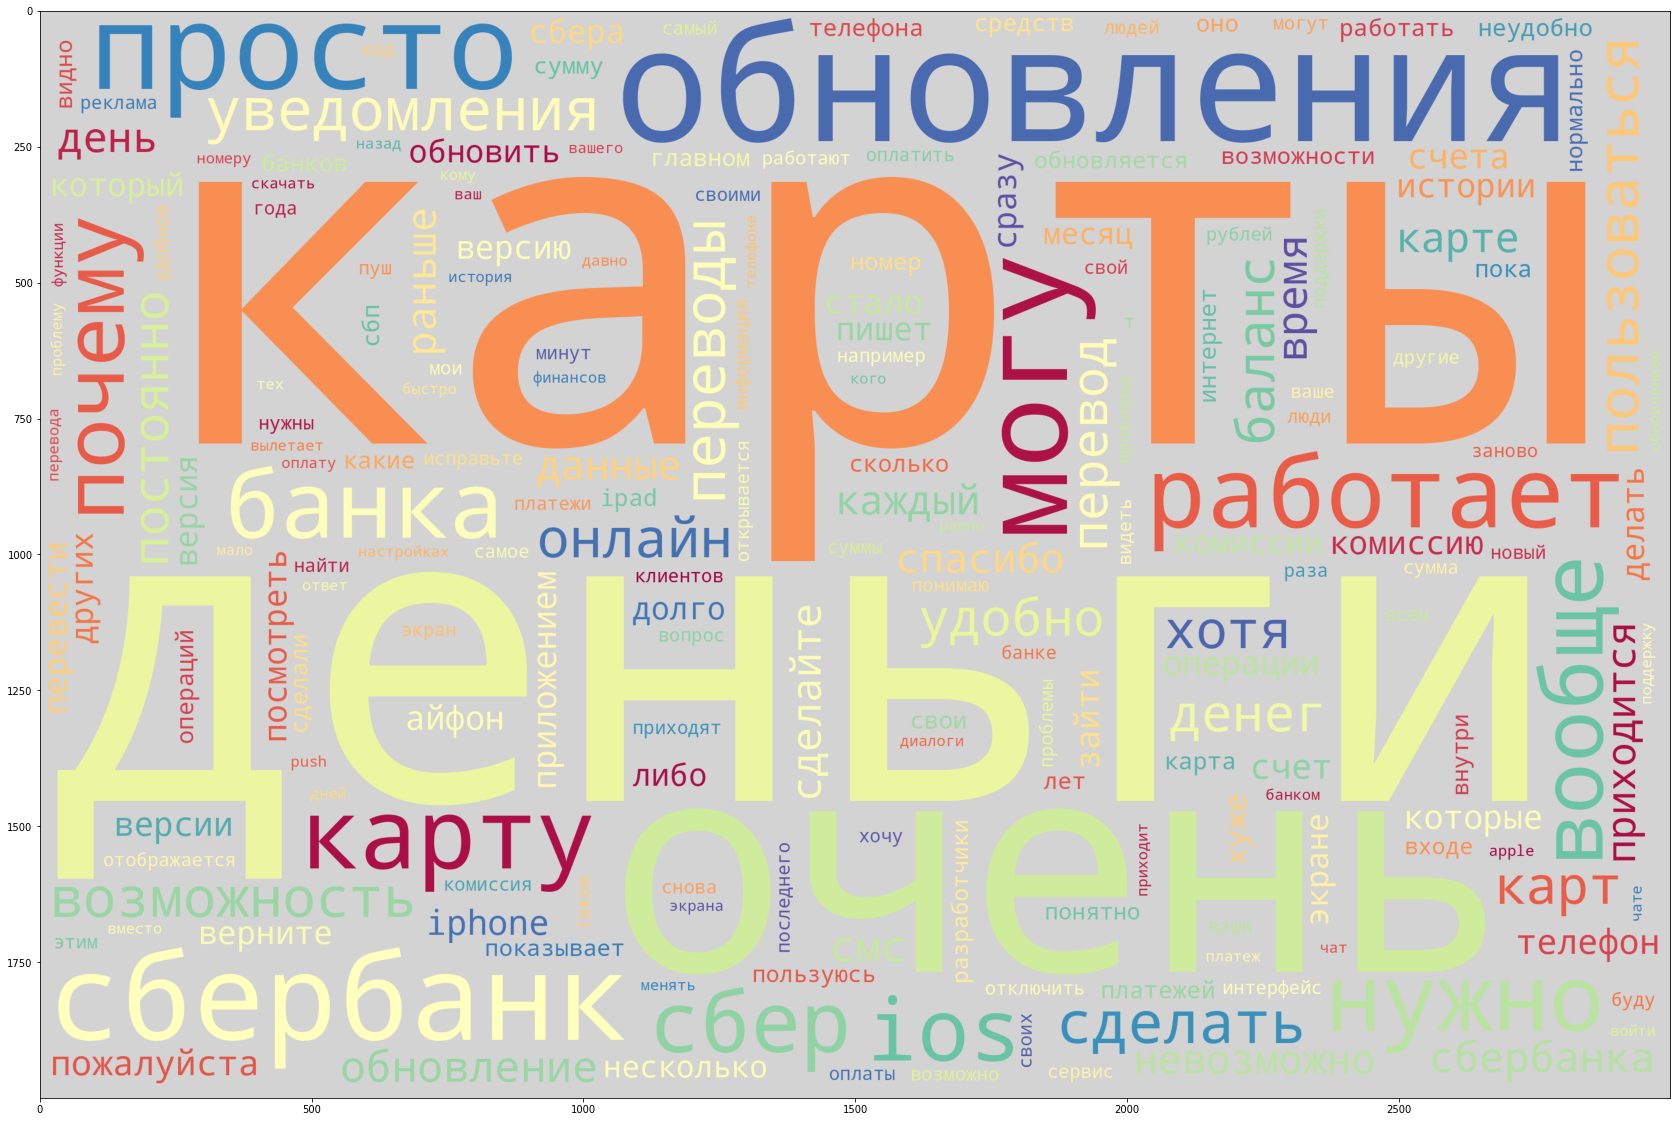

In [10]:
drawCloud(rev_review) #wordcloud of reviews

In [11]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
res_reviews = model.predict(reviews.review, k = 2)

In [12]:
df_rev = pd.DataFrame(res_reviews)
print('Avarage sentimental levels of reviews:') 
print(df_rev.mean())

Avarage sentimental levels of reviews:
neutral     0.683252
negative    0.266677
positive    0.304800
speech      0.488589
skip        0.158045
dtype: float64
